# stSME Comparison

This tutorial shows the stSME normalization effect between of two scenarios: 
- (1) normal (without stSME) 
- (2) stSME applied on raw gene counts

In this tutorial we use **Mouse Brain (Coronal)** Visium dataset from [10x genomics website](https://support.10xgenomics.com/spatial-gene-expression/datasets/1.0.0/V1_Adult_Mouse_Brain).

In [1]:
import scanpy as sc
import stlearn as st
import pathlib as pathlib
import numpy as np
import random as random
import os as os

st.settings.set_figure_params(dpi=120)

# Make sure all the seeds are set
seed = 0
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Ignore all warnings
import warnings

warnings.filterwarnings("ignore")

/Users/andrew/conda/stlearn/lib/python3.12/site-packages/scanpy/_utils/__init__.py:33: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/Users/andrew/conda/stlearn/lib/python3.12/site-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/Users/andrew/conda/stlearn/lib/python3.12/site-packages/scanpy/readwrite.py:16: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/Users/andrew/conda/stlearn/lib/python3.12/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this 

In [2]:
st.settings.datasetdir =  pathlib.Path.cwd().parent / "data"

In [3]:
data = sc.datasets.visium_sge(sample_id="V1_Adult_Mouse_Brain")
data = st.convert_scanpy(data)

In [4]:
# pre-processing for gene count table
st.pp.filter_genes(data, min_cells=1)
st.pp.normalize_total(data)
st.pp.log1p(data)

Normalization step is finished in adata.X
Log transformation step is finished in adata.X


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
# pre-processing for spot image
st.pp.tiling(data, out_path="tiling")

# this step uses deep learning model to extract high-level features from tile images
# may need few minutes to be completed
st.pp.extract_feature(data)

Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|█████████▉ [ time left: 00:00 ]

The morphology feature is added to adata.obsm['X_morphology']!


In [6]:
# run PCA for gene expression data
st.em.run_pca(data, n_comps=50)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


### (1) normal (without stSME) 

In [7]:
data_normal = data.copy()

#### marker gene for CA3

AnnData object with n_obs × n_vars = 2702 × 21949
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'tile_path'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'log1p', 'pca'
    obsm: 'spatial', 'X_tile_feature', 'X_morphology', 'X_pca'
    varm: 'PCs'

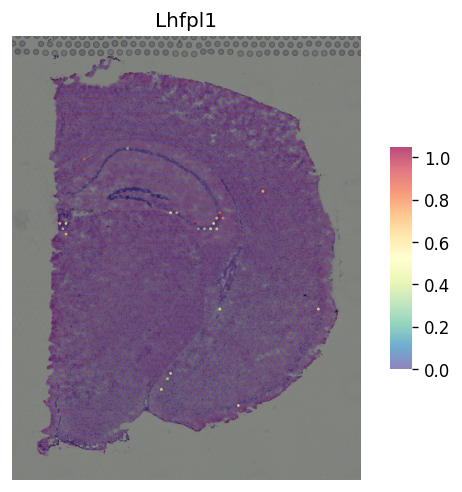

In [8]:
i = "Lhfpl1"
st.pl.gene_plot(data_normal, gene_symbols=i, size=3)

#### marker gene for DG

AnnData object with n_obs × n_vars = 2702 × 21949
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'tile_path'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'log1p', 'pca'
    obsm: 'spatial', 'X_tile_feature', 'X_morphology', 'X_pca'
    varm: 'PCs'

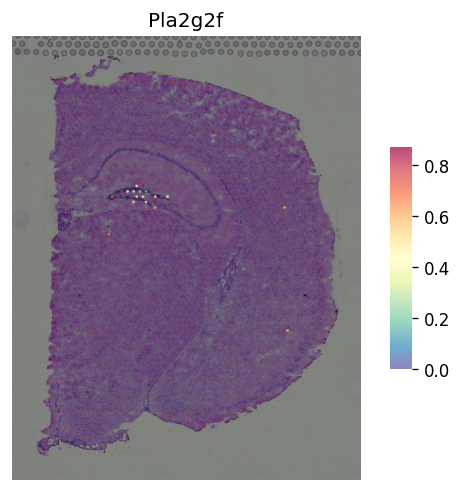

In [9]:
i = "Pla2g2f"
st.pl.gene_plot(data_normal, gene_symbols=i, size=3)

### (2) stSME applied on raw gene counts

In [10]:
data_SME = data.copy()
# apply stSME to normalise log transformed data
st.spatial.SME.SME_normalize(data_SME, use_data="raw")
data_SME.X = data_SME.obsm['raw_SME_normalized']
st.em.run_pca(data_SME, n_comps=50)

Adjusting data: 100%|██████████ [ time left: 00:00 ]


The data adjusted by SME is added to adata.obsm['raw_SME_normalized']
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


#### marker gene for CA3

AnnData object with n_obs × n_vars = 2702 × 21949
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'tile_path'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'log1p', 'pca', 'gene_expression_correlation', 'physical_distance', 'morphological_distance', 'weights_matrix_all', 'weights_matrix_pd_gd', 'weights_matrix_pd_md', 'weights_matrix_gd_md'
    obsm: 'spatial', 'X_tile_feature', 'X_morphology', 'X_pca', 'imputed_data', 'top_weights', 'raw_SME_normalized'
    varm: 'PCs'

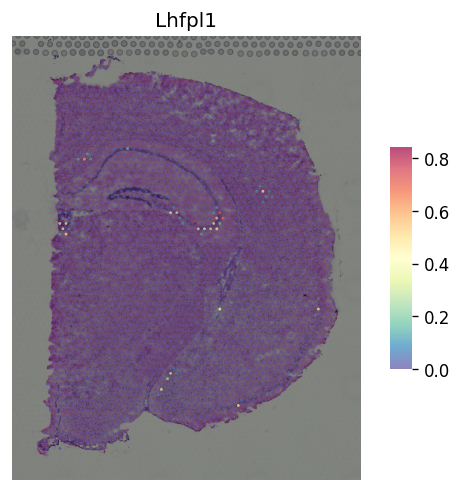

In [11]:
i = "Lhfpl1"
st.pl.gene_plot(data_SME, gene_symbols=i, size=3)

#### marker gene for DG

AnnData object with n_obs × n_vars = 2702 × 21949
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'tile_path'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'log1p', 'pca', 'gene_expression_correlation', 'physical_distance', 'morphological_distance', 'weights_matrix_all', 'weights_matrix_pd_gd', 'weights_matrix_pd_md', 'weights_matrix_gd_md'
    obsm: 'spatial', 'X_tile_feature', 'X_morphology', 'X_pca', 'imputed_data', 'top_weights', 'raw_SME_normalized'
    varm: 'PCs'

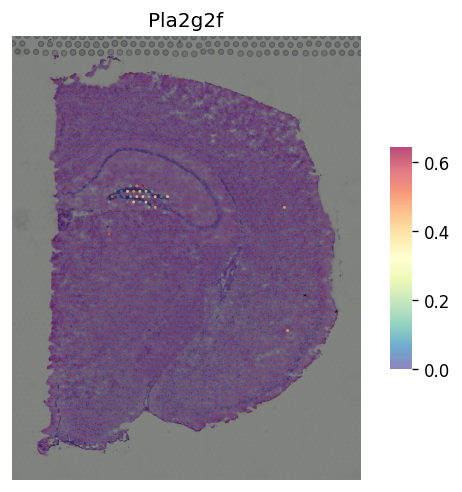

In [12]:
i = "Pla2g2f"
st.pl.gene_plot(data_SME, gene_symbols=i, size=3)

<b>Tutorial by Xiao Tan</b>